In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [2]:
#fonte dos dados: https://brasil.io/dataset/covid19/files/ acessado em 30/12/2020 
data = pd.read_csv('/content/drive/MyDrive/covid/caso.csv')
data.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-12-29,AC,NaN,state,41232,791,288,True,881935.0,894470.0,12.0,4609.65712,0.0192
1,2020-12-28,AC,NaN,state,41010,789,287,False,881935.0,894470.0,12.0,4584.83795,0.0192
2,2020-12-27,AC,NaN,state,40900,785,286,False,881935.0,894470.0,12.0,4572.54016,0.0192
3,2020-12-26,AC,NaN,state,40736,780,285,False,881935.0,894470.0,12.0,4554.20528,0.0191
4,2020-12-25,AC,NaN,state,40723,780,284,False,881935.0,894470.0,12.0,4552.75191,0.0192


In [3]:
#filtrando por estado
data_go = data[data['state'] == 'GO']
data_go = data_go[data_go['place_type'] == 'state']

In [4]:
#conversão do campo data
data_go['date'] = pd.to_datetime(data_go['date'])
data_go.dtypes

date                              datetime64[ns]
state                                     object
city                                      object
place_type                                object
confirmed                                  int64
deaths                                     int64
order_for_place                            int64
is_last                                     bool
estimated_population_2019                float64
estimated_population                     float64
city_ibge_code                           float64
confirmed_per_100k_inhabitants           float64
death_rate                               float64
dtype: object

Text(0, 0.5, 'Óbitos')

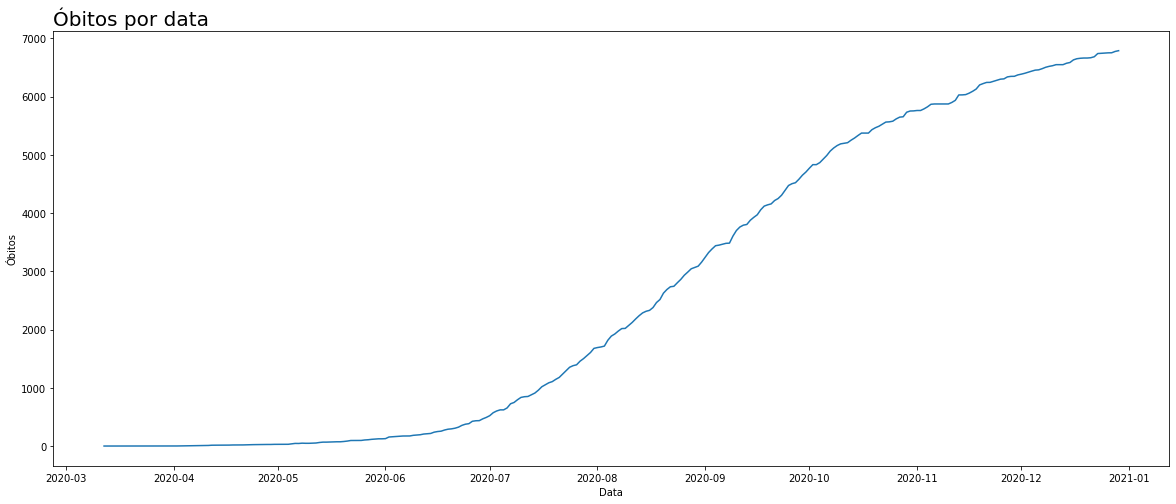

In [6]:
#crescimento dos óbitos por data
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='date', y='deaths', data=data_go)
fig.set_title('Óbitos por data', loc='left', fontsize=20)
fig.set_xlabel('Data')
fig.set_ylabel('Óbitos')

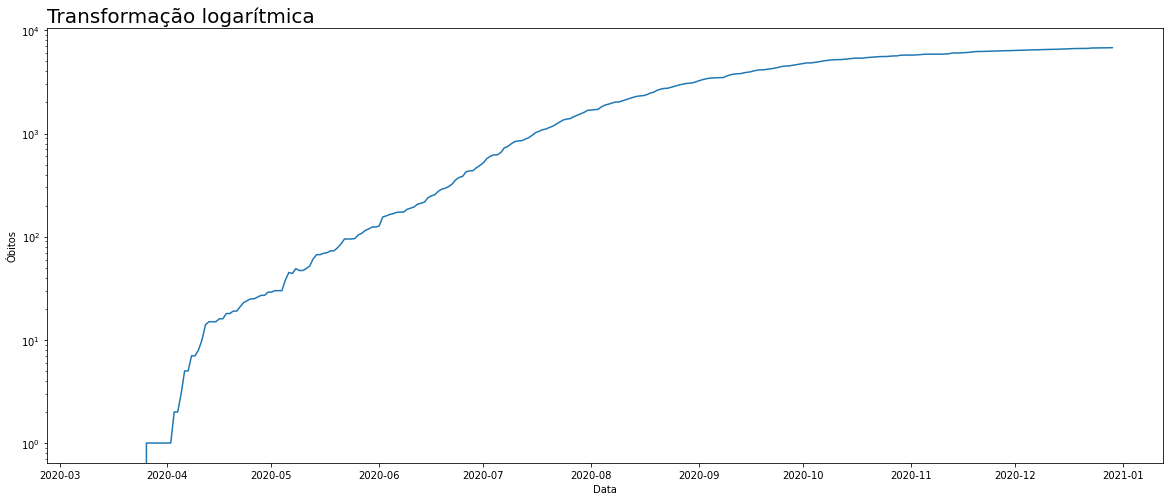

In [7]:
#transformação logarítmica
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='date', y='deaths', data=data_go)
fig.set_title('Transformação logarítmica', loc='left', fontsize=20)
fig.set_xlabel('Data')
fig.set_ylabel('Óbitos')
fig.set_yscale('log')

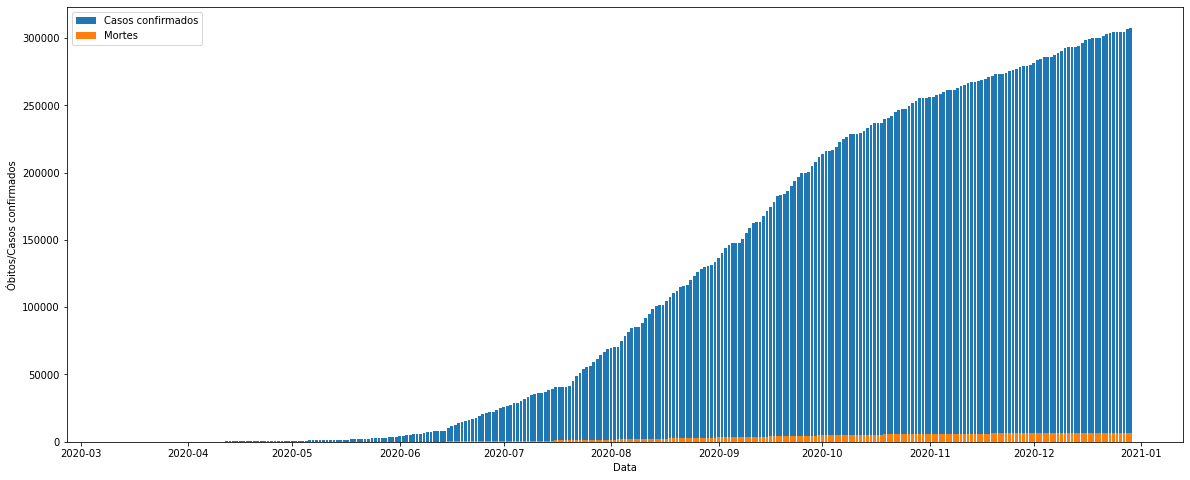

In [8]:
#comparação casos confirmados X mortes
plt.figure(figsize=(20,8))
fig = plt.bar(data_go.date, data_go.confirmed, label='Casos confirmados')
plt.bar(data_go.date, data_go.deaths, label='Mortes')
plt.xlabel('Data')
plt.ylabel('Óbitos/Casos confirmados', rotation=90)
plt.legend()

In [9]:
data_go.sort_values(by='date', inplace=True)


In [10]:
data_go['acceleration_confirmed'] = data_go['confirmed'].diff()
data_go['acceleration_deaths'] = data_go['deaths'].diff()
data_go.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,acceleration_confirmed,acceleration_deaths
118219,2020-03-12,GO,NaN,state,3,0,1,False,7018354.0,7113540.0,52.0,0.04217,0.0,NaN,NaN
118218,2020-03-13,GO,NaN,state,3,0,2,False,7018354.0,7113540.0,52.0,0.04217,0.0,0.0,0.0
118217,2020-03-14,GO,NaN,state,4,0,3,False,7018354.0,7113540.0,52.0,0.05623,0.0,1.0,0.0
118216,2020-03-15,GO,NaN,state,4,0,4,False,7018354.0,7113540.0,52.0,0.05623,0.0,0.0,0.0
118215,2020-03-16,GO,NaN,state,9,0,5,False,7018354.0,7113540.0,52.0,0.12652,0.0,5.0,0.0


Text(0, 0.5, 'Casos confirmados')

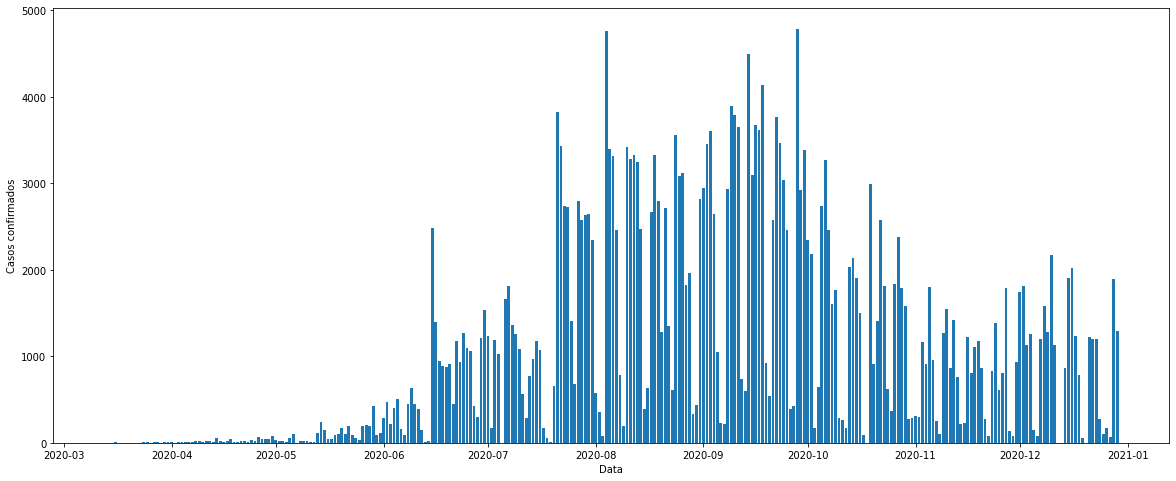

In [11]:
#aceleração dos novos casos
plt.figure(figsize=(20,8))
fig = plt.bar(data_go.date, data_go.acceleration_confirmed, label='Aceleração de novos casos')
plt.xlabel('Data')
plt.ylabel('Casos confirmados', rotation=90)

Text(0, 0.5, 'Óbitos')

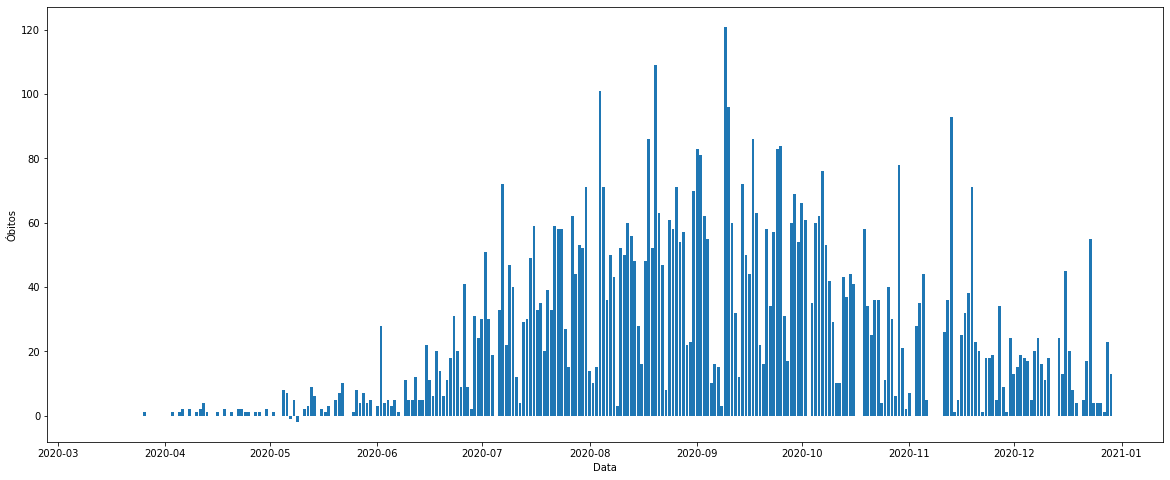

In [12]:
#aceleração dos óbitos
plt.figure(figsize=(20,8))
fig = plt.bar(data_go.date, data_go.acceleration_deaths, label='Aceleração de óbitos')
plt.xlabel('Data')
plt.ylabel('Óbitos', rotation=90)

In [13]:
data_go['mean_deaths'] = data_go['deaths'].rolling(window=14, center=False).mean()
data_go.head(50)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,acceleration_confirmed,acceleration_deaths,mean_deaths
118219,2020-03-12,GO,NaN,state,3,0,1,False,7018354.0,7113540.0,52.0,0.04217,0.0000,NaN,NaN,NaN
118218,2020-03-13,GO,NaN,state,3,0,2,False,7018354.0,7113540.0,52.0,0.04217,0.0000,0.0,0.0,NaN
118217,2020-03-14,GO,NaN,state,4,0,3,False,7018354.0,7113540.0,52.0,0.05623,0.0000,1.0,0.0,NaN
118216,2020-03-15,GO,NaN,state,4,0,4,False,7018354.0,7113540.0,52.0,0.05623,0.0000,0.0,0.0,NaN
118215,2020-03-16,GO,NaN,state,9,0,5,False,7018354.0,7113540.0,52.0,0.12652,0.0000,5.0,0.0,NaN
118214,2020-03-17,GO,NaN,state,10,0,6,False,7018354.0,7113540.0,52.0,0.14058,0.0000,1.0,0.0,NaN
118213,2020-03-18,GO,NaN,state,12,0,7,False,7018354.0,7113540.0,52.0,0.16869,0.0000,2.0,0.0,NaN
118212,2020-03-19,GO,NaN,state,15,0,8,False,7018354.0,7113540.0,52.0,0.21087,0.0000,3.0,0.0,NaN
118211,2020-03-20,GO,NaN,state,18,0,9,False,7018354.0,7113540.0,52.0,0.25304,0.0000,3.0,0.0,NaN
118210,2020-03-21,GO,NaN,state,19,0,10,False,7018354.0,7113540.0,52.0,0.26710,0.0000,1.0,0.0,NaN


<BarContainer object of 293 artists>

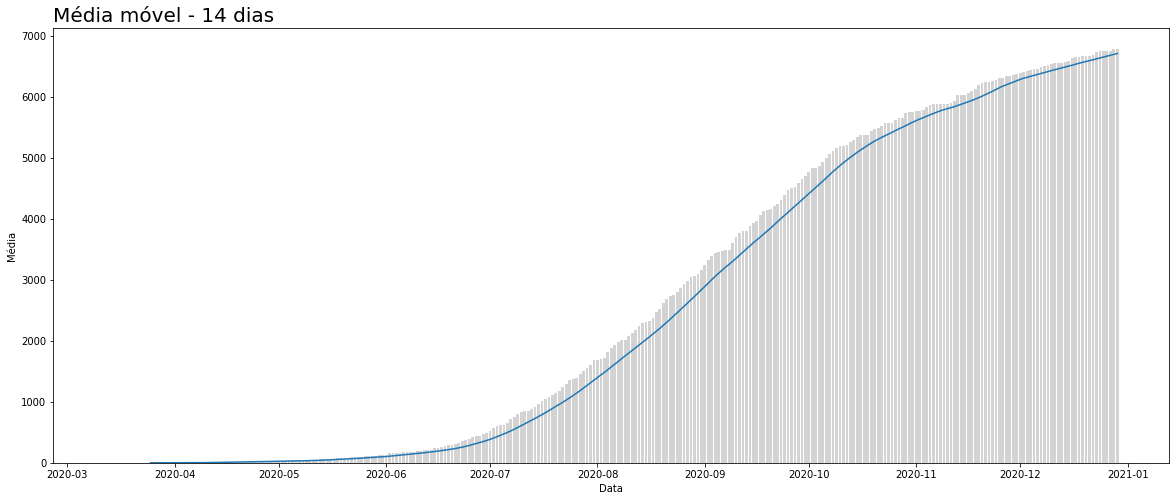

In [14]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='date', y='mean_deaths', data=data_go)
fig.set_title('Média móvel - 14 dias', loc='left', fontsize=20)
fig.set_xlabel('Data')
fig.set_ylabel('Média')
plt.bar(data_go['date'], data_go['deaths'], color='lightgrey')

In [36]:
data_go['month'] = pd.to_datetime(data_go['date'])
data_go['day'] = data_go['month'].dt.day_name()
data_go.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,acceleration_confirmed,acceleration_deaths,mean_deaths,month,day
118219,2020-03-12,GO,NaN,state,3,0,1,False,7018354.0,7113540.0,52.0,0.04217,0.0,NaN,NaN,NaN,2020-03-12,Thursday
118218,2020-03-13,GO,NaN,state,3,0,2,False,7018354.0,7113540.0,52.0,0.04217,0.0,0.0,0.0,NaN,2020-03-13,Friday
118217,2020-03-14,GO,NaN,state,4,0,3,False,7018354.0,7113540.0,52.0,0.05623,0.0,1.0,0.0,NaN,2020-03-14,Saturday
118216,2020-03-15,GO,NaN,state,4,0,4,False,7018354.0,7113540.0,52.0,0.05623,0.0,0.0,0.0,NaN,2020-03-15,Sunday
118215,2020-03-16,GO,NaN,state,9,0,5,False,7018354.0,7113540.0,52.0,0.12652,0.0,5.0,0.0,NaN,2020-03-16,Monday


In [37]:
dias = {'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado', 'Sunday':'Domingo', 'Monday':'Segunda', 'Tuesday':'Terça',
       'Wednesday':'Quarta'}


In [38]:
data_go['day'] = data_go['day'].map(dias)


In [41]:
data_go.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,acceleration_confirmed,acceleration_deaths,mean_deaths,month,day
118219,2020-03-12,GO,NaN,state,3,0,1,False,7018354.0,7113540.0,52.0,0.04217,0.0,NaN,NaN,NaN,2020-03-12,Quinta
118218,2020-03-13,GO,NaN,state,3,0,2,False,7018354.0,7113540.0,52.0,0.04217,0.0,0.0,0.0,NaN,2020-03-13,Sexta
118217,2020-03-14,GO,NaN,state,4,0,3,False,7018354.0,7113540.0,52.0,0.05623,0.0,1.0,0.0,NaN,2020-03-14,Sabado
118216,2020-03-15,GO,NaN,state,4,0,4,False,7018354.0,7113540.0,52.0,0.05623,0.0,0.0,0.0,NaN,2020-03-15,Domingo
118215,2020-03-16,GO,NaN,state,9,0,5,False,7018354.0,7113540.0,52.0,0.12652,0.0,5.0,0.0,NaN,2020-03-16,Segunda


In [53]:
dados_agrupados  = data_go.groupby('day')['confirmed', 'deaths','acceleration_deaths'].mean().round()
dados_agrupados['day'] = dados_agrupados.index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [54]:
dados_agrupados

,confirmed,deaths,acceleration_deaths,day
day,,,,
Domingo,116122.0,2645.0,6.0,Domingo
Quarta,115871.0,2628.0,31.0,Quarta
Quinta,114423.0,2598.0,34.0,Quinta
Sabado,115921.0,2638.0,11.0,Sabado
Segunda,117403.0,2669.0,24.0,Segunda
Sexta,115583.0,2627.0,29.0,Sexta
Terça,118973.0,2696.0,28.0,Terça


In [55]:
dados_agrupados = dados_agrupados.reindex(['Domingo', 'Segunda','Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado'])
dados_agrupados

,confirmed,deaths,acceleration_deaths,day
day,,,,
Domingo,116122.0,2645.0,6.0,Domingo
Segunda,117403.0,2669.0,24.0,Segunda
Terça,118973.0,2696.0,28.0,Terça
Quarta,115871.0,2628.0,31.0,Quarta
Quinta,114423.0,2598.0,34.0,Quinta
Sexta,115583.0,2627.0,29.0,Sexta
Sabado,115921.0,2638.0,11.0,Sabado


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


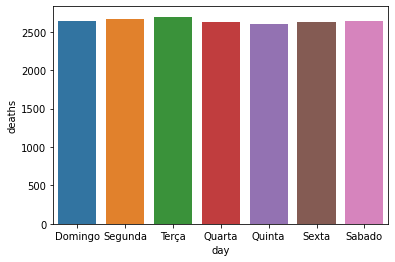

In [56]:
sns.barplot(dados_agrupados['day'], dados_agrupados.deaths)